In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [25]:
data_frame = pd.read_csv("C:/Users/Qwerty/ANALYSIS/my_hub/STATISTICS/data_folder/hw_aa.csv", sep=";").drop(columns=("Unnamed: 0"))
data_frame.head()

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [18]:
# A/A test example working properly

  0%|          | 0/1000 [00:00<?, ?it/s]

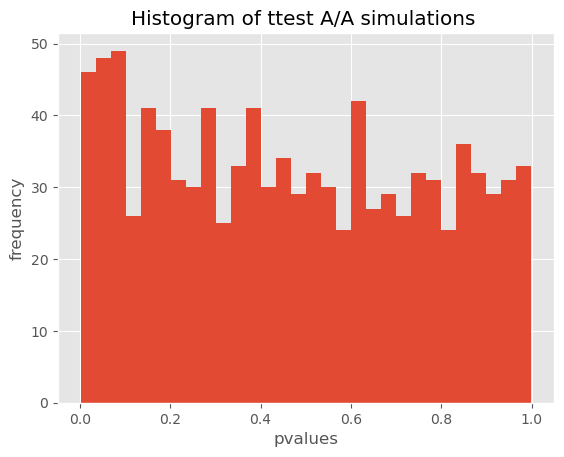

p_value:  0.068
# p_values < 0.05:  68
# p_values > 0.05:  932


In [39]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# start simulations of A/ A test
for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # get p_values into res

plt.hist(res, bins = 30)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# number of p_values 
print("p_value: ", sum(np.array(res) < 0.05) / simulations)
print("# p_values < 0.05: ", sum(np.array(res) < 0.05) )
print("# p_values > 0.05: ", sum(np.array(res) > 0.05) )

In [40]:
# p_value:  0.053 which is slightly > .05 mean we accept H0 and split system works good.

In [41]:
# ------------------

In [42]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127018 entries, 0 to 127017
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   uid                127018 non-null  object
 1   experimentVariant  127018 non-null  int64 
 2   version            127018 non-null  object
 3   purchase           127018 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ MB


In [43]:
data_frame.experimentVariant.unique()

array([1, 0], dtype=int64)

In [44]:
exp_0 = data_frame.query("experimentVariant == 0")["purchase"]

In [45]:
exp_1 = data_frame.query("experimentVariant == 1")["purchase"]

  0%|          | 0/1000 [00:00<?, ?it/s]

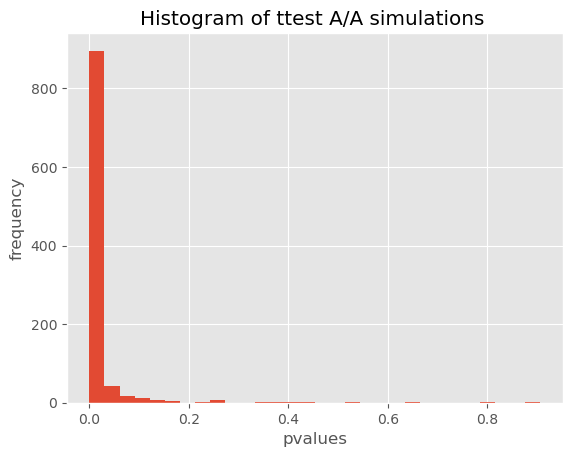

p_value:  0.927
# p_values < 0.05:  927
# p_values > 0.05:  73


In [48]:
# AA test
n = 100000
simulations = 1000
n_s = 1000
res = []

# start simulations of A/ A test
for i in tqdm(range(simulations)):
    s1 = exp_1\
                .sample(n_s, replace = False).values
    s2 = exp_0\
                .sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 30)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# number of p_values
print("p_value: ", sum(np.array(res) <0.05) / simulations)
print("# p_values < 0.05: ", sum(np.array(res) < 0.05) )
print("# p_values > 0.05: ", sum(np.array(res) > 0.05) )

In [ ]:
# Distribution is not similar to the example above. There is a mistake in the data.

In [49]:
#data investigation

In [51]:
data_frame.version.value_counts()

v2.8.0      82835
v2.9.0      23954
v3.8.0.0    11804
v3.7.4.0     8425
Name: version, dtype: int64

In [58]:
explored_data = data_frame\
    .groupby(["version", "experimentVariant"], as_index=False)\
    .agg({"purchase":"mean"})\
    .sort_values("purchase", ascending=False)\
    .reset_index(drop=True)

explored_data

,version,experimentVariant,purchase
0,v2.9.0,0,0.074658
1,v2.9.0,1,0.071304
2,v3.7.4.0,1,0.063018
3,v3.8.0.0,1,0.062848
4,v3.7.4.0,0,0.059943
5,v3.8.0.0,0,0.057604
6,v2.8.0,1,0.045606
7,v2.8.0,0,0.000993


In [62]:
data_frame.query("version=='v2.8.0' & experimentVariant == 0").describe()

,experimentVariant,purchase
count,41283.0,41283.000000
mean,0.0,0.000993
std,0.0,0.031499
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,1.000000


In [ ]:
# Conduct A/A test w/o version=='v2.8.0'

In [64]:
exp_0_0 = data_frame.query("experimentVariant == 0 & version != 'v2.8.0'")["purchase"]

In [65]:
exp_1_1 = data_frame.query("experimentVariant == 1 & version != 'v2.8.0'")["purchase"]

  0%|          | 0/1000 [00:00<?, ?it/s]

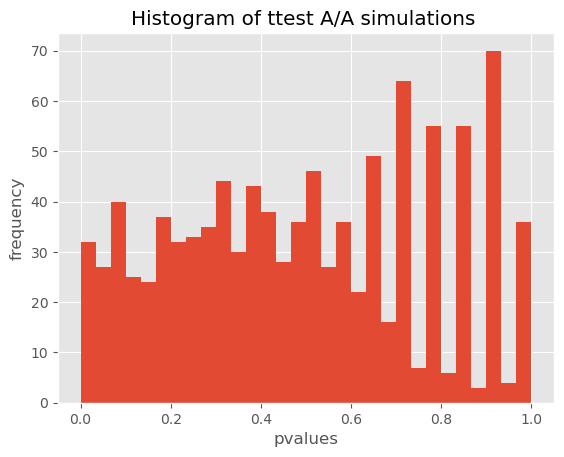

p_value:  0.043
# p_values < 0.05:  43
# p_values > 0.05:  957


In [68]:
# AA test
n = 100000
simulations = 1000
n_s = 1000
res = []

# start simulations of A/ A test
for i in tqdm(range(simulations)):
    s1 = exp_0_0\
                .sample(n_s, replace = False).values
    s2 = exp_1_1\
                .sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 30)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# number of p_values
print("p_value: ", sum(np.array(res) <0.05) / simulations)
print("# p_values < 0.05: ", sum(np.array(res) < 0.05) )
print("# p_values > 0.05: ", sum(np.array(res) > 0.05) )

In [ ]:
# Data provided in version=='v2.8.0' is not adequate. But A/A test works well.